<a href="https://colab.research.google.com/github/Kyeong-Ah/test333/blob/kka/m2(abs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
from IPython.core.pylabtools import figsize
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [ ]:
# # Arima
# # 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/시간별 데이터 합.csv', encoding='cp949')
m2_abs = pd.DataFrame()
yymm = []
yymm = pd.date_range("2011-01", "2022-01", freq="M")
m2_abs['ymd'] = yymm
m2_abs['m2'] = data['m2(abs)']
timeSeries = m2_abs.loc[:, ['ymd', 'm2']]
# timeSeries.index = timeSeries.ymd
timeSeries.drop('ymd', axis=1)
timeSeries = timeSeries.set_index('ymd')
print(timeSeries.head(5))
ts = timeSeries
print(ts)
print(ts.info())


                   m2
ymd                  
2011-01-31  1676448.8
2011-02-28  1674390.5
2011-03-31  1677475.9
2011-04-30  1684792.4
2011-05-31  1690543.0
                   m2
ymd                  
2011-01-31  1676448.8
2011-02-28  1674390.5
2011-03-31  1677475.9
2011-04-30  1684792.4
2011-05-31  1690543.0
...               ...
2021-08-31  3487634.0
2021-09-30  3513680.8
2021-10-31  3543363.8
2021-11-30  3594723.2
2021-12-31  3620057.5

[132 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2011-01-31 to 2021-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m2      132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB
None


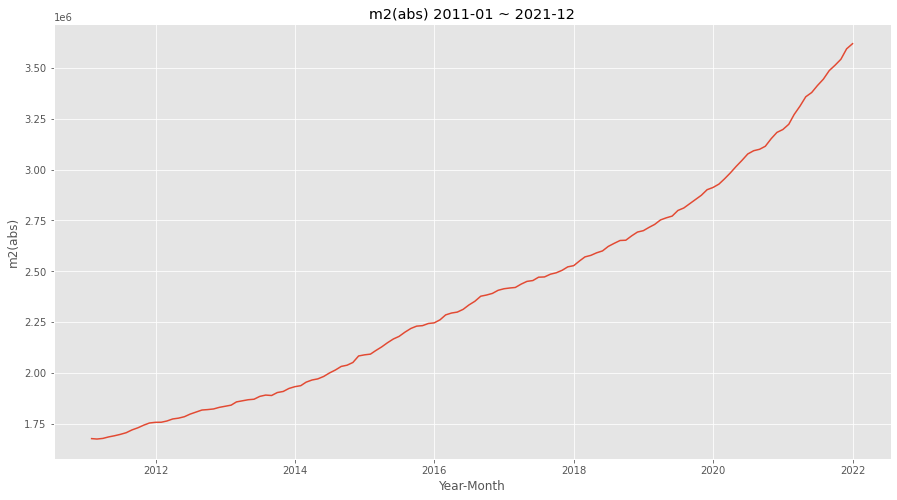

In [ ]:
# # 2011-01부터 2021-12 까지 구별-월별 아파트 평당가격 그래프
plt.figure(figsize=(15, 8))
plt.plot(ts)
plt.title("m2(abs) 2011-01 ~ 2021-12")
plt.xlabel("Year-Month")
plt.ylabel("m2(abs)")
plt.show()


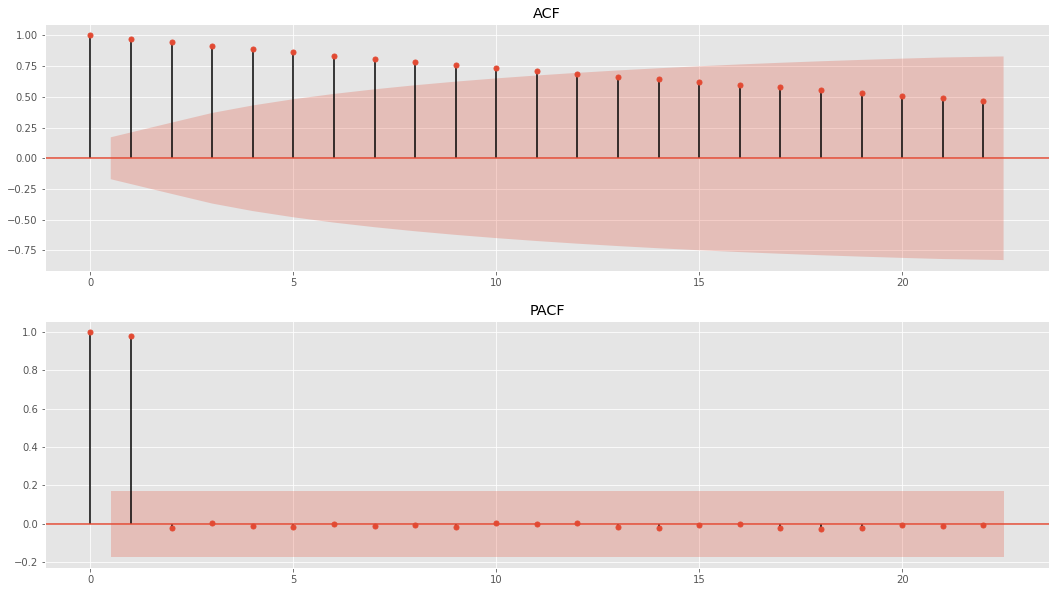

In [ ]:
# # ACF, PACF 그래프
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(18, 10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig = plot_acf(ts, ax = ax1)
ax1.set_title("ACF")
fig = plot_pacf(ts, ax = ax2)
ax2.set_title("PACF")
plt.show()


<Figure size 432x288 with 0 Axes>

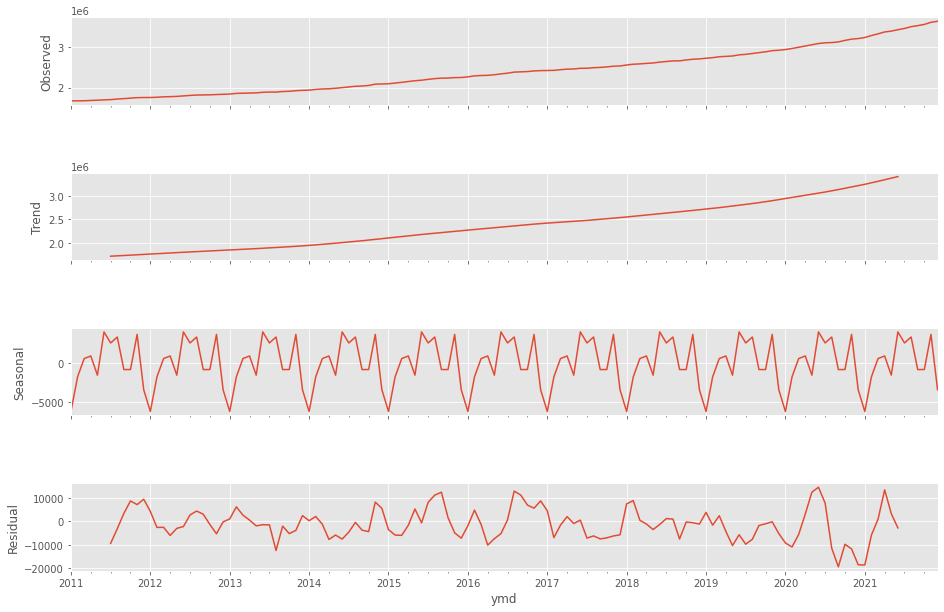

In [ ]:
# # seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['m2'], model='additive')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()


In [ ]:
# # 정상성 확인 : ADF(Augmented Dickey-Fuller test)
# # 귀무가설 : 자료가 정상성을 만족하지 않는다. / 대립가설 : 자료가 정상성을 만족한다.

''' 콜랩에서 adfuller가 임포트가 안 되서... 이건 보류. '''

# from statsmodels.tsa.stattools import adfuller
# result1 = adfuller(ts)
# print('ADF Statistic : %f'% result1[0])
# print('p-value : %f'% result1[1])
# print('Critical Values : ')
# for key, value in result1[4].items():
#     print('\t%s: %.3f'%(key, value))
# ''' ADF Statistic : 3.745713
#     p-value : 1.000000
#     Critical Values : 
#         1%: -3.487
#         5%: -2.886
#         10%: -2.580            '''

# # 1차 차분
# ts_diff = ts - ts.shift()
# print(ts_diff)

# # 1차 차분 데이터로 다시 정상성 검사
# from statsmodels.tsa.stattools import adfuller
# result2 = adfuller(ts_diff[1:])
# print(result2)
# print('\n1차 차분 후')
# print('ADF Statistic : %f'% result2[0])
# print('p-value : %f'% resul2t[1])
# print('Critical Values : ')
# for key, value in result2[4].items():
#     print('\t%s: %.3f'%(key, value))

' 콜랩에서 adfuller가 임포트가 안 되서... 이건 보류. '

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


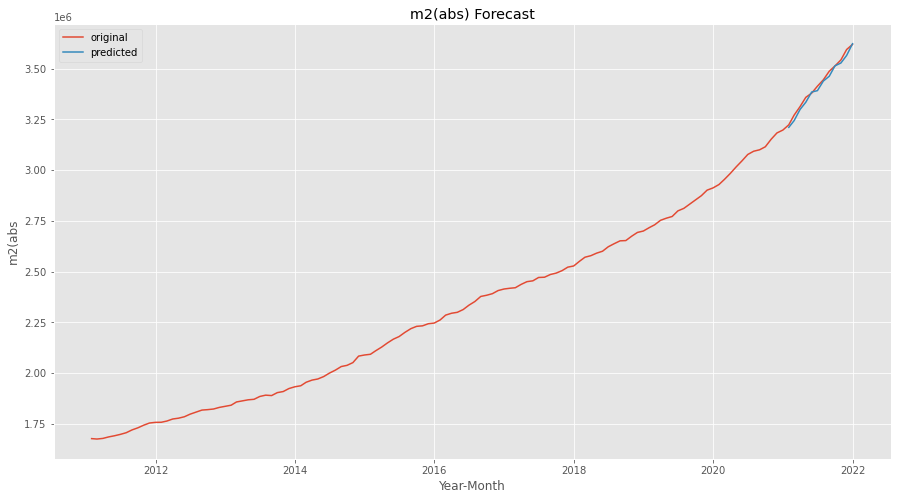

                             ARIMA Model Results                              
Dep. Variable:                   D.m2   No. Observations:                  131
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1381.865
Method:                       css-mle   S.D. of innovations           9215.683
Date:                Tue, 07 Jun 2022   AIC                           2769.730
Time:                        14:00:54   BIC                           2778.356
Sample:                    02-28-2011   HQIC                          2773.235
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.475e+04   1186.863     12.431      0.000    1.24e+04    1.71e+04
ma.L1.D.m2     0.4776      0.077      6.164      0.000       0.326       0.629
                                    Roots           

In [ ]:
# # ARIMA 모델 만들기
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(ts, order=(0, 1, 1))
model_fit = model.fit()
# predict
start_index = m2_abs['ymd'][120] # 2021-01-31 00:00:00
end_index = m2_abs['ymd'][131]   # 2021-12-31 00:00:00
forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

# 시각화
plt.figure(figsize=(15, 8))
plt.plot(m2_abs.ymd, m2_abs['m2(abs)'], label="original")
plt.plot(forecast, label='predicted')
plt.title("m2(abs) Forecast")
plt.xlabel("Year-Month")
plt.ylabel("m2(abs")
plt.legend()
plt.show()

print(model_fit.summary())


In [ ]:
# # 성능 확인
from sklearn import metrics

def score_check(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #     mae = round(metrices.mean_absolute_error(y_true, y_pred),3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3)
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)
    
    df = pd.DataFrame({
        'R2':r2,
        'Corr':corr,
        'RMSE':rmse,
        'MAPE':mape
    },
                    index=[0])
    return df

score_check(np.array(m2_abs[m2_abs.ymd>=start_index]['m2(abs)']), np.array(forecast))


,R2,Corr,RMSE,MAPE
0,97.757,0.996,18134.433,0.451


In [ ]:
fore = model_fit.forecast(steps=12)
print('예측', fore)
'''   ※ stderr
      (array([3633169.1173565,
              3647923.56079389,
              3662678.00423128,
              3677432.44766867,
              3692186.89110606,
              3706941.33454346,
              3721695.77798085,
              3736450.22141824,
              3751204.66485563,
              3765959.10829302,
              3780713.55173041,
              3795467.9951678]),
       ※ upper bound
       array([ 9215.68280801,
              16442.09993016,
              21348.45405666,
              25321.34141598,
              28750.37689493,
              31811.91619655,
              34603.63929692,
              37186.3643435,
              39601.00419917,
              41876.64473282,
              44034.84091687,
              46092.09319471]),
       ※ lower bound
       array([[3615106.71095985, 3651231.52375314],
              [3615697.63710056, 3680149.48448722],
              [3620835.80315463, 3704520.20530793],
              [3627803.5304531 , 3727061.36488424],
              [3635837.18785005, 3748536.59436208],
              [3644591.12451902, 3769291.54456789],
              [3653873.89122486, 3789517.66473683],
              [3663566.286589  , 3809334.15624748],
              [3673588.12287363, 3828821.20683763],
              [3683882.39282332, 3848035.82376272],
              [3694406.84946839, 3867020.25399243],
              [3705129.15253411, 3885806.8378015 ]]))
'''


예측 (array([3633169.1173565 , 3647923.56079389, 3662678.00423128,
       3677432.44766867, 3692186.89110606, 3706941.33454346,
       3721695.77798085, 3736450.22141824, 3751204.66485563,
       3765959.10829302, 3780713.55173041, 3795467.9951678 ]), array([ 9215.68280801, 16442.09993016, 21348.45405666, 25321.34141598,
       28750.37689493, 31811.91619655, 34603.63929692, 37186.3643435 ,
       39601.00419917, 41876.64473282, 44034.84091687, 46092.09319471]), array([[3615106.71095985, 3651231.52375314],
       [3615697.63710056, 3680149.48448722],
       [3620835.80315463, 3704520.20530793],
       [3627803.5304531 , 3727061.36488424],
       [3635837.18785005, 3748536.59436208],
       [3644591.12451902, 3769291.54456789],
       [3653873.89122486, 3789517.66473683],
       [3663566.286589  , 3809334.15624748],
       [3673588.12287363, 3828821.20683763],
       [3683882.39282332, 3848035.82376272],
       [3694406.84946839, 3867020.25399243],
       [3705129.15253411, 3885806.837801

'   ※ stderr\n      (array([3633169.1173565,\n              3647923.56079389,\n              3662678.00423128,\n              3677432.44766867,\n              3692186.89110606,\n              3706941.33454346,\n              3721695.77798085,\n              3736450.22141824,\n              3751204.66485563,\n              3765959.10829302,\n              3780713.55173041,\n              3795467.9951678]),\n       ※ upper bound\n       array([ 9215.68280801,\n              16442.09993016,\n              21348.45405666,\n              25321.34141598,\n              28750.37689493,\n              31811.91619655,\n              34603.63929692,\n              37186.3643435,\n              39601.00419917,\n              41876.64473282,\n              44034.84091687,\n              46092.09319471]),\n       ※ lower bound\n       array([[3615106.71095985, 3651231.52375314],\n              [3615697.63710056, 3680149.48448722],\n              [3620835.80315463, 3704520.20530793],\n              